<a href="https://colab.research.google.com/github/FahadFarrukh/Basic-Flutter-Form/blob/main/College_Admission_Labwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# College Admission Classification Labwork

Import Modules

In [129]:
# here are all the modules i added one by one which were required in this notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



Using pandas, load "College Admission Train Data.csv"

In [130]:
# here i loaded the training dataset

data = pd.read_csv("/content/College Admission Train Data.csv")

In [131]:
# checking column names

data.columns


Index(['Exam1', 'Exam2', 'Decision'], dtype='object')

---

In this section, we will ignore the previous jury decision.


Plot the dataset using scores only :

/tmp/ipython-input-2043645154.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Exam1'], data['Exam2'], c='blue', s=2, cmap="prism")


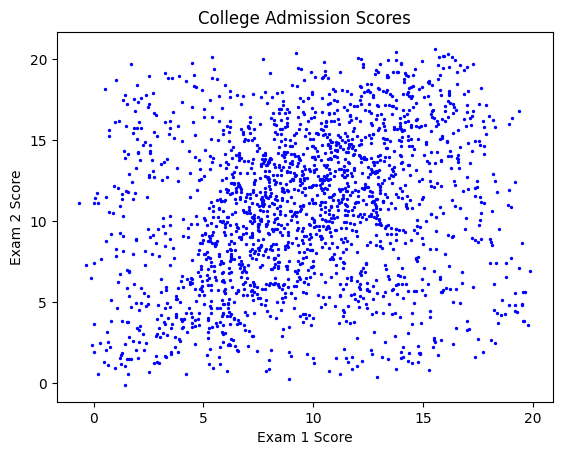

In [132]:

# here i am displaying the graph of all the data points in my training dataset

#plt.figure(figsize=(8, 6)) # i could make the graph bigger with this, but currently commenting it out

plt.scatter(data['Exam1'], data['Exam2'], c='blue', s=2, cmap="prism")


plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('College Admission Scores')
plt.grid(False) # tried to turn the grids on, but turned it to false
plt.show()

Compute the decision for each student (admitted if mean > 10) and store it in an array named decision:

In [133]:
# mean of Exam1 and Exam2

mean_scores = (data['Exam1'] + data['Exam2']) / 2

# decision is true if mean > 10 else False

decision = mean_scores > 10

# first 10 decisions

decision[:10]


,0
0,True
1,True
2,True
3,True
4,False
5,False
6,False
7,True
8,True
9,True


Plot the dataset using decision as color :

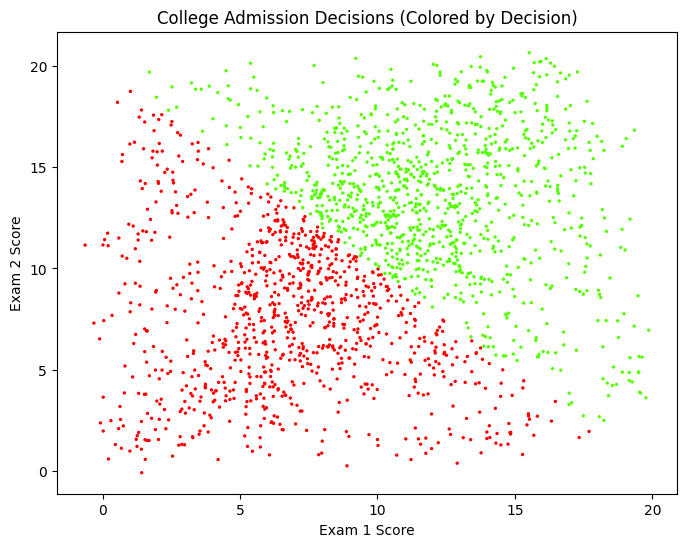

In [134]:
# in this cell i have seperated both accepted
# and not accepted by different colors, and
# they are according to mean of exam1 and exam2

plt.figure(figsize=(8, 6))


plt.scatter(data['Exam1'], data['Exam2'], s=2, c=decision, cmap="prism")

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('College Admission Decisions (Colored by Decision)')

plt.show()


In [135]:
# pre given function of the seperation in the graph by red and green background

def plot_decision_boundary(data, decision, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.05):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = (xx.ravel() + yy.ravel()) / 2 > 10
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(data['Exam1'], data['Exam2'], s=2, c=decision, cmap="prism")
    plt.show()

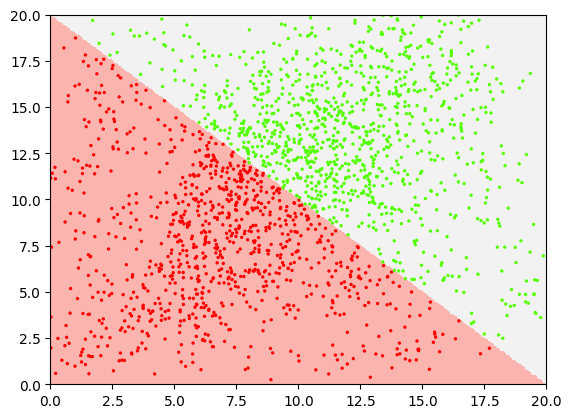

In [136]:
# here i called the above function and put the mean descion array and data points of exam1 and exam 2

plot_decision_boundary(data, decision)


Plot the dicision boundaries and the data points (Apply class color from the dataset decision) :

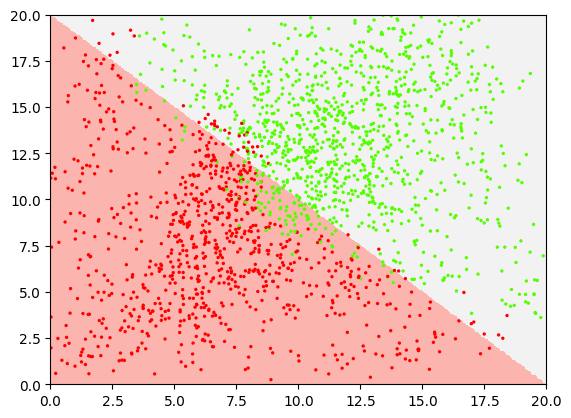

In [137]:
# now this is the graph with the original decisions in the dataset

dataset_decision = np.array(data['Decision'])
plot_decision_boundary(data, dataset_decision)


What is the algorithm decision accuracy related to the jury decision ??

In [138]:
# here i check the accuarcy of mean vs dataset decisions

y_true = np.array(data['Decision'])
y_pred = np.array(decision)

correct = y_true == y_pred

accuracy = np.sum(correct) / len(y_true)
print("Accuracy:", accuracy * 100, "%")


Accuracy: 92.9 %


# Linear Discriminant Analysis

Create and fit the model

In [139]:
# here i ready the x and y label to put in the ml models,
# x is the inputs, and y is the output,
# so exam1 and exam2 in x and decsion in y

X = data[['Exam1', 'Exam2']].values
y = data['Decision'].values

In [140]:
# here i invoke the LDA model and fit the x and y

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [141]:
# here i predict the model output based on the input

y_pred = lda.predict(X)


Display the data and the decision boundaries

In [142]:
# pre given function to us

def plot_model_decision_boundary(model, input_data, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.1):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=input_data['Decision'], cmap="prism")
    plt.show()

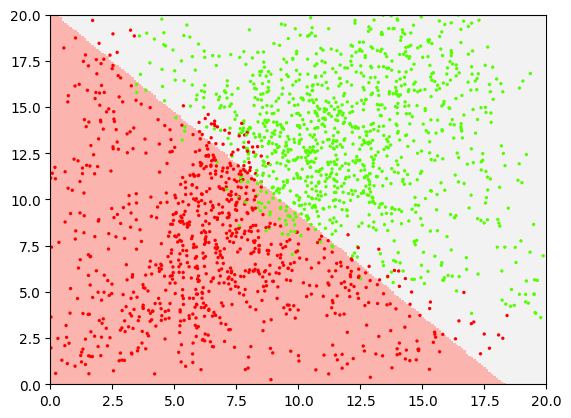

In [143]:
plot_model_decision_boundary(lda, data)

Measure the accuracy of your model

In [144]:
# here i check the accuracy of LDA

accuracy = np.sum(y_pred == y) / len(y)
print("Training Accuracy:", accuracy * 100, "%")


Training Accuracy: 93.7 %


# Quadratic Discriminant Analysis

In [145]:
# here i invoke the QDA model and fit the x and y

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)


QuadraticDiscriminantAnalysis()

In [146]:
# here i predict the model output based on the input

y_pred = qda.predict(X)


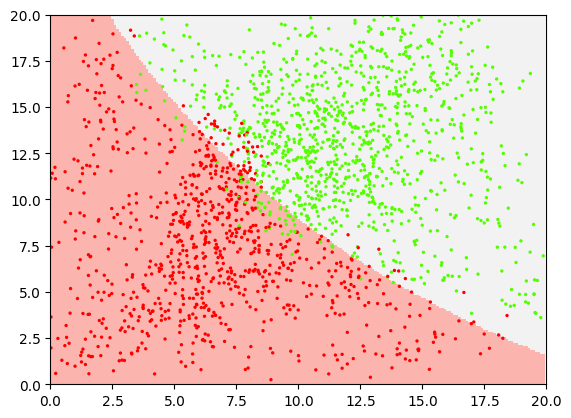

In [147]:
plot_model_decision_boundary(qda, data)

In [148]:
# here i check the accuracy of QDA

accuracy = np.sum(y_pred == y) / len(y)
print("Training Accuracy (QDA):", accuracy * 100, "%")


Training Accuracy (QDA): 94.45 %


---
# Decisision Tree Classifier

In [149]:
 # here i invoke the Decision Tree model and fit the x and y
 # confusion here

tree = DecisionTreeClassifier()
tree.fit(X, y)


DecisionTreeClassifier()

In [150]:
# here i predict the model output based on the input
y_pred = tree.predict(X)


In [151]:


accuracy = np.sum(y_pred == y) / len(y)
print("Training Accuracy (Decision Tree):", accuracy * 100, "%")


Training Accuracy (Decision Tree): 100.0 %


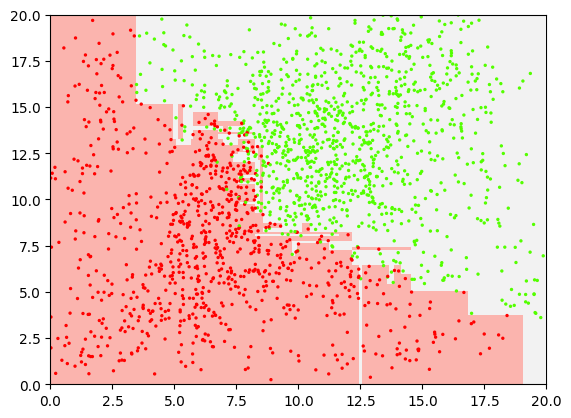

In [152]:
plot_model_decision_boundary(tree, data)


---

# Create a K-Nearest Neighbors Classifier (KNN)

In [153]:

# n_neighbors=5 means the model looks at the 5 nearest neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)


KNeighborsClassifier()

In [154]:
# here i predict the model output based on the input

y_pred = knn.predict(X)



In [155]:
# here i check the accuracy of KNN

accuracy = np.sum(y_pred == y) / len(y)
print("Training Accuracy (KNN):", accuracy * 100, "%")


Training Accuracy (KNN): 96.55 %


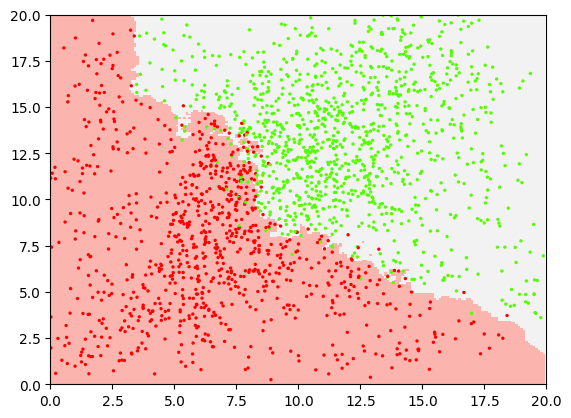

In [156]:
plot_model_decision_boundary(knn, data)


# Random Forest

In [157]:
# n_estimators = number of trees, random_state for reproducibility
# confusion here


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

In [158]:
# here i predict the model output based on the training dataset input

y_pred = rf.predict(X)



In [159]:
# here i check the accuracy of Random Forest

accuracy = np.sum(y_pred == y) / len(y)
print("Training Accuracy (Random Forest):", accuracy * 100, "%")


Training Accuracy (Random Forest): 100.0 %


---

Load 'College Admission Test Data.csv'

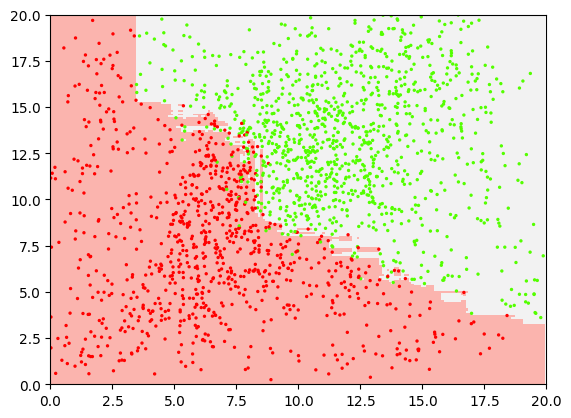

In [160]:
plot_model_decision_boundary(rf, data)


Compute and print the accuracy of all models on test data

In [161]:
# now loading test data

test_data = pd.read_csv("/content/College Admission Test Data.csv")

In [162]:
X_test = test_data[['Exam1', 'Exam2']].values  # Test features
y_test = test_data['Decision'].values          # True labels for test


In [163]:
# LDA
y_pred_lda = lda.predict(X_test)
accuracy_lda = np.sum(y_pred_lda == y_test) / len(y_test)

# QDA
y_pred_qda = qda.predict(X_test)
accuracy_qda = np.sum(y_pred_qda == y_test) / len(y_test)

# Decision Tree
y_pred_tree = tree.predict(X_test)
accuracy_tree = np.sum(y_pred_tree == y_test) / len(y_test)

# K-Nearest Neighbors
y_pred_knn = knn.predict(X_test)
accuracy_knn = np.sum(y_pred_knn == y_test) / len(y_test)

# Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = np.sum(y_pred_rf == y_test) / len(y_test)


In [164]:
print(f"LDA Accuracy: {accuracy_lda*100:.2f}%")
print(f"QDA Accuracy: {accuracy_qda*100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy_tree*100:.2f}%")
print(f"KNN Accuracy: {accuracy_knn*100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf*100:.2f}%")


LDA Accuracy: 93.80%
QDA Accuracy: 95.90%
Decision Tree Accuracy: 94.70%
KNN Accuracy: 96.10%
Random Forest Accuracy: 95.80%
